# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [97]:
import pandas as pd

student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

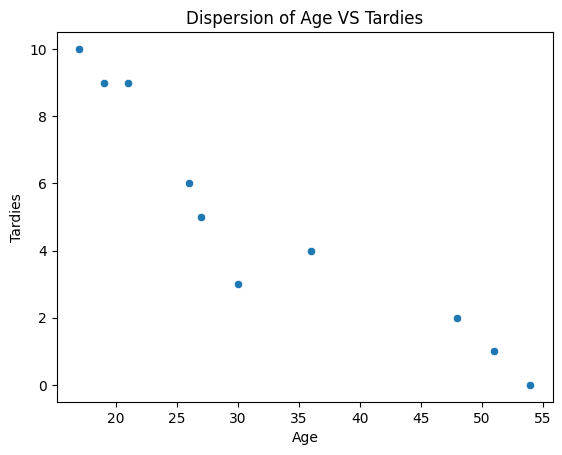

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=student_data, x=student_data.Age, y=student_data.Tardies)
plt.title("Dispersion of Age VS Tardies")
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

#### Answer:
* ##### About Trend: "Less Age == More Tardies" OR "More Age == Less Tardies".
* ##### About Hypothesis: "Older people takes less time to complete a task" OR "Younger people takes more time to complete a task".

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [99]:
covariance = student_data.Age.cov(student_data.Tardies)
correlation = student_data.Age.corr(student_data.Tardies)

print(f"covariance: {covariance}")
print(f"correlation: {correlation}")

covariance: -45.56666666666666
correlation: -0.9391626886887122


#### Answer:
* ##### The difference between these two measures is that covariance is in the scale of the variables while correlation is in a scale of -1 to +1.
* ##### covariance is telling us that while Age increases Tardies tends to decrease significantly. correlation is telling us that the two variables are correlated by an strongly negative correlation.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [100]:
from sklearn.linear_model import LinearRegression

X = student_data[['Age']]
y = student_data['Tardies']

model = LinearRegression()
model.fit(X, y)

LinearRegression()

#### Answer:
* ##### Outcome variable: student_data.Tardies
* ##### Linear Regression


Plot your regression model on your scatter plot.

In [101]:
m = model.coef_[0]
n = model.intercept_

def prediction(x):
    return m * x + n

student_data['prediction'] = student_data['Age'].apply(prediction)
student_data['error_predict'] = (student_data['prediction'] - student_data['Tardies']).abs()

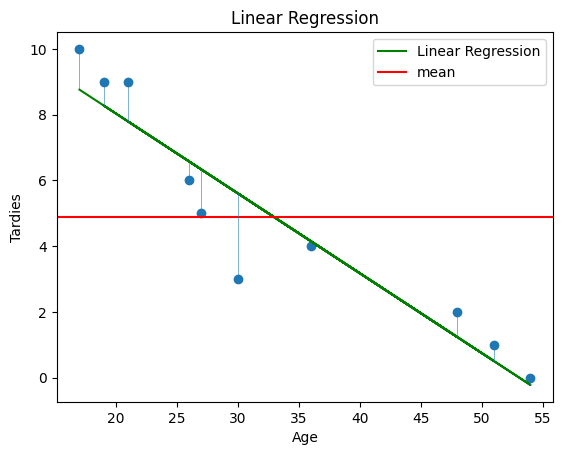

In [102]:
plt.scatter(X, y)
plt.xlabel("Age")
plt.ylabel("Tardies")
plt.title("Linear Regression")
plt.plot(X, prediction(X), label='Linear Regression', c='g')
plt.axhline(student_data.Tardies.mean(), label="mean", c="red")
plt.vlines(X, student_data.prediction, y, lw=0.4)
plt.legend()
plt.show()

Interpret the results of your model. What conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [103]:
from sklearn import metrics
import numpy as np

mae = metrics.mean_absolute_error(student_data.Tardies, student_data.prediction)
mse = metrics.mean_squared_error(student_data.Tardies, student_data.prediction)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(student_data.Tardies, student_data.prediction)

print(f"MAE is: {mae}")
print(f"MSE is: {mse}")
print(f"RMSE is: {rmse}")
print(f"r2 is: {r2}")

MAE is: 0.9319083427082718
MSE is: 1.3319201847356268
RMSE is: 1.1540884648655088
r2 is: 0.8820265558250109


#### Answer:
* ##### About conclusions: We can say, with a confidence of 88%, that the model can predict the Tardies in relation with the Age.
* ##### About variable Age: Age is a good predictor in this case.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [104]:
# Import any libraries you may need & the data
df = pd.read_csv('vehicles.csv')
df.sample()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
34411,Volkswagen,Golf,2006,2.0,4.0,Manual 5-spd,Front-Wheel Drive,Compact Cars,Regular,13.73375,21,29,24,370.291667,1400


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

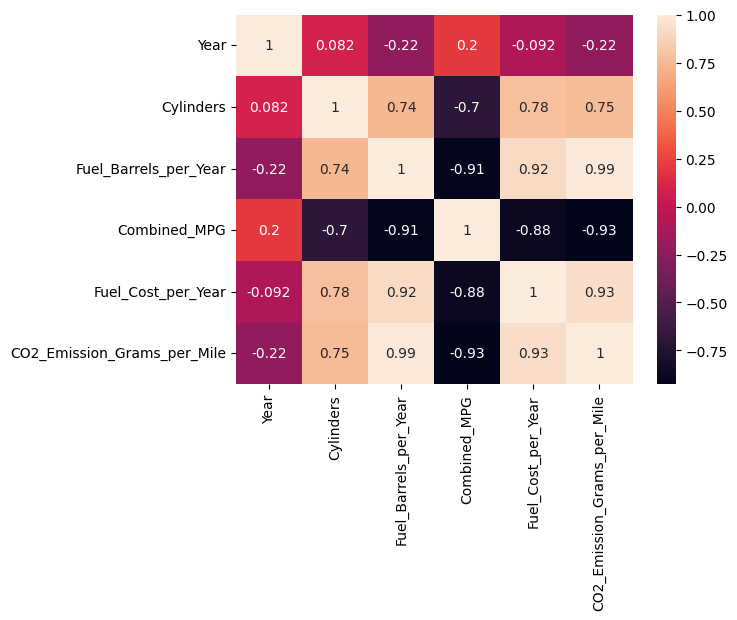

In [105]:
cars = df[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]
cars = cars.rename(columns=lambda x: x.replace(" ", "_")) # Change to don't get errors on model
cars = cars.rename(columns=lambda x: x.replace("/", "_per_")) # Change to don't get errors on model

sns.heatmap(cars.corr(), annot=True)
plt.show()

#### Answer:
* ##### most important: 'Fuel Barrels/Year'.
* ##### less important: 'Year'.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [106]:
import statsmodels.formula.api as smf

model = smf.ols("Fuel_Barrels_per_Year ~ CO2_Emission_Grams_per_Mile", data=cars).fit()
model

#### Answer: OLS Linear Regression

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [107]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Fuel_Barrels_per_Year   R-squared:                       0.973
Model:                               OLS   Adj. R-squared:                  0.973
Method:                    Least Squares   F-statistic:                 1.275e+06
Date:                   Sun, 30 Jul 2023   Prob (F-statistic):               0.00
Time:                           17:43:03   Log-Likelihood:                -40183.
No. Observations:                  35952   AIC:                         8.037e+04
Df Residuals:                      35950   BIC:                         8.039e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.0210      0.016      1.308      0.191      -0.010       0.052
CO2_Emission_Grams_per_Mile     0.0370   3.28e-05   1128.967      0.000       0.037       0.037
==============================================================================
Omnibus:                    89519.440   Durbin-Watson:                   0.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1018755233.256
Skew:                         -27.445   Prob(JB):                         0.00
Kurtosis:                     825.839   Cond. No.                     2.02e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 